In [2]:
import numpy as np
import math
import pandas as pd
from pandas import DataFrame
import os
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import pylab



In [6]:
Tin_Tout_2060 = pd.read_excel('../data/operating_temperature_2060.xlsx') 



In [9]:
Tin_Tout_2060

,time.yy,time.mm,time.dd,time.hh,Operating temperature,tre200h0
0,2060,5,1,0,17.491584,11.8
1,2060,5,1,1,16.899194,12.1
2,2060,5,1,2,16.494409,12.5
3,2060,5,1,3,16.109555,12.7
4,2060,5,1,4,15.753822,12.8
...,...,...,...,...,...,...
3667,2060,9,30,19,18.558376,14.9
3668,2060,9,30,20,18.077275,13.8
3669,2060,9,30,21,17.617827,13.1
3670,2060,9,30,22,17.193093,12.4


In [15]:
Tin_Tout

,Unnamed: 0,station,time,radiation,temp,dwp,wind,wbgt,wbgt_sun
0,1,BAS,2.015010e+09,241.0,-5.1,-5.8,1.5,-5.251393,-3.832171
1,2,BAS,2.015010e+09,223.0,-5.7,-6.6,1.0,-5.888265,-4.356797
2,3,BAS,2.015010e+09,221.0,-6.1,-7.1,0.8,-6.304738,-4.669031
3,4,BAS,2.015010e+09,222.0,-5.5,-6.6,0.7,-5.730835,-4.026900
4,5,BAS,2.015010e+09,224.0,-6.1,-7.1,0.5,-6.304738,-4.518832
...,...,...,...,...,...,...,...,...,...
175323,175324,SMA,2.018123e+09,NaN,NaN,NaN,NaN,NaN,NaN
175324,175325,SMA,2.018123e+09,NaN,NaN,NaN,NaN,NaN,NaN
175325,175326,SMA,2.018123e+09,NaN,NaN,NaN,NaN,NaN,NaN
175326,175327,SMA,2.018123e+09,NaN,NaN,NaN,NaN,NaN,NaN


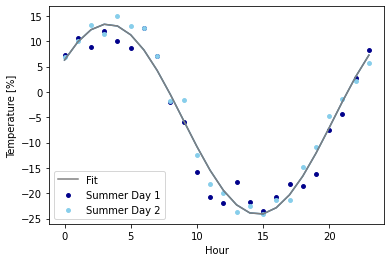

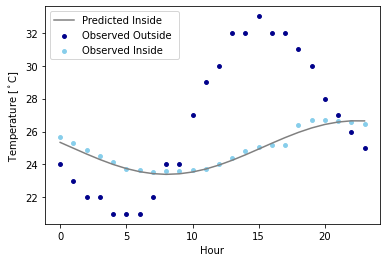

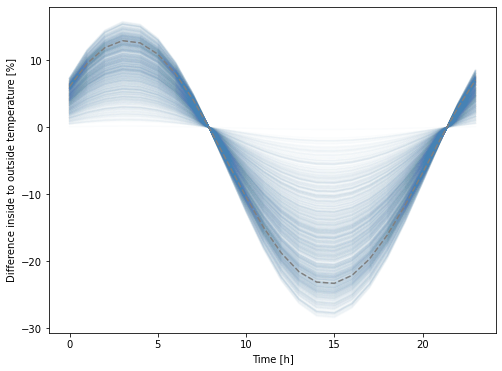

In [173]:
def T_diff_fit(x, a, b, c, phi):           # estimation of the function that could fit the data points
    return a * np.sin(b * x + phi) + c

Tin_Tout = pd.read_csv('../data/temperature_inside.csv')

#data for first heat day
Tout = Tin_Tout['Tout1']
Tin = Tin_Tout['Tin1']
diff_T1 = (Tin-Tout)/Tout

#second heat day
Tout = Tin_Tout['Tout2']
Tin = Tin_Tout['Tin2']
diff_T2 = (Tin-Tout)/Tout

time = Tin_Tout['Time']


p0 = [10, 2*np.pi/24.0, -3.0, np.pi/4 ] # estimation of one point
Tin_est, pcov  = curve_fit(T_diff_fit, time, (diff_T1+diff_T2)/2, p0, method='dogbox') # get fit    
fit1=T_diff_fit(time,*Tin_est)


#plot of the points and the fitted sinus
fig,ax = plt.subplots(1,1)
ax.plot(time,fit1*100)
ax.scatter(time,diff_T1*100,label = 'Summer Day 1',s=15,color = 'darkblue')
ax.scatter(time,diff_T2*100, label = 'Summer Day 2',s=15,color='skyblue')
ax.set_xlabel('Hour')
ax.set_ylabel('Temperature [%]')
ax.plot(time,fit1*100,label='Fit',color='gray')
ax.legend()


Tin_est, pcov  = curve_fit(T_diff_fit, time, (Tout+fit1*Tout), p0, method='dogbox')    
fit2=T_diff_fit(time,*Tin_est)
fig,ax = plt.subplots(1,1)
ax.scatter(time,Tout,s=15,color = 'darkblue',label = 'Observed Outside ')
ax.scatter(time,Tin,label='Observed Inside ',s=15,color='skyblue')
ax.plot(time,fit2,label='Predicted Inside ' ,color='gray') 
ax.set_xlabel('Hour')
ax.set_ylabel('Temperature [$^\circ$C]')
ax.legend()


fig,ax = plt.subplots(figsize=(8,6))
for i in range(1000):
    error = np.random.triangular(0,1,1.2)
    
    Tin_est, pcov  = curve_fit(T_diff_fit, time, (diff_T1+diff_T2)/2*error, p0, method='dogbox')    

    fit=T_diff_fit(time,*Tin_est)
    ax.plot(time, fit*100,color = 'steelblue',alpha = 0.02)
ax.plot(time,fit*100,color='gray',label='observed', linestyle='--')
ax.set_xlabel('Time [h]')
ax.set_ylabel('Difference inside to outside temperature [%]')
plt.savefig(''.join(['../figures/temperature_inside_outside.pdf']),bbox_inches='tight')   
     


In [380]:
Tin_Tout_2060 = pd.read_excel('../data/operating_temperature_2060.xlsx') 

day_months_o22 = Tin_Tout_2060[Tin_Tout_2060['tre200h0']>22][['time.mm', 'time.dd']].groupby(['time.mm', 'time.dd']).mean().reset_index()

In [381]:
Tin_Tout_2060 = Tin_Tout_2060[(Tin_Tout_2060['time.mm'].isin(day_months_o22['time.mm']))&(Tin_Tout_2060['time.dd'].isin(day_months_o22['time.dd']))]

In [382]:
keep_tuples = pd.MultiIndex.from_frame(day_months_o22[['time.mm','time.dd']])
tuples_in_df = pd.MultiIndex.from_frame(Tin_Tout_2060[['time.mm','time.dd']])
Tin_Tout_2060 = Tin_Tout_2060[tuples_in_df.isin(keep_tuples)].reset_index()

In [383]:
Tin_Tout_2060

,index,time.yy,time.mm,time.dd,time.hh,Operating temperature,tre200h0
0,72,2060,5,4,0,19.518592,18.3
1,73,2060,5,4,1,19.204714,18.2
2,74,2060,5,4,2,18.918086,17.9
3,75,2060,5,4,3,18.618113,17.7
4,76,2060,5,4,4,18.318224,17.5
...,...,...,...,...,...,...,...
2515,3331,2060,9,16,19,22.316341,20.7
2516,3332,2060,9,16,20,22.057710,20.6
2517,3333,2060,9,16,21,21.774686,19.9
2518,3334,2060,9,16,22,21.417830,19.0


In [384]:
Tin_Tout_2060['tre200h0']
Tin = Tin_Tout_2060['Operating temperature']
Tout = Tin_Tout_2060['tre200h0']
diff_T_2060 = (Tin-Tout)/Tout

In [385]:
Tin_Tout_2060['Operating temperature'][Tin_Tout_2060['tre200h0']<22] = np.nan
#Tin_Tout_2060.dropna(inplace=True)

/var/folders/f5/lms0b90j1kx7kk4v552qkjqw0000gp/T/ipykernel_86030/3875022677.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Tin_Tout_2060['Operating temperature'][Tin_Tout_2060['tre200h0']<22] = np.nan


In [386]:
Tin_Tout_2060

,index,time.yy,time.mm,time.dd,time.hh,Operating temperature,tre200h0
0,72,2060,5,4,0,NaN,18.3
1,73,2060,5,4,1,NaN,18.2
2,74,2060,5,4,2,NaN,17.9
3,75,2060,5,4,3,NaN,17.7
4,76,2060,5,4,4,NaN,17.5
...,...,...,...,...,...,...,...
2515,3331,2060,9,16,19,NaN,20.7
2516,3332,2060,9,16,20,NaN,20.6
2517,3333,2060,9,16,21,NaN,19.9
2518,3334,2060,9,16,22,NaN,19.0


In [387]:
np.random.normal(0, 0.1)

0.04015242880155059

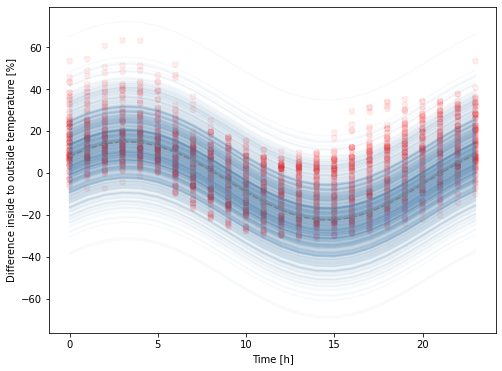

In [388]:
fig,ax = plt.subplots(figsize=(8,6))
for i in range(1000):
    error = np.random.normal(0, 0.13)
    
    Tin_est, pcov  = curve_fit(T_diff_fit, time, (diff_T1+diff_T2)/2+error, p0, method='dogbox')    

    fit=T_diff_fit(time,*Tin_est)
    ax.plot(time, fit*100,color = 'steelblue',alpha = 0.04)
ax.scatter(Tin_Tout_2060['time.hh'],diff_T_2060*100,color='red',label='observed', linestyle='--', alpha=0.07)
ax.plot(time,fit*100,color='gray',label='observed', linestyle='--')

#ax.set_xlim(8,20)

diff_T_2060
diff_T_2060
ax.set_xlabel('Time [h]')
ax.set_ylabel('Difference inside to outside temperature [%]')
plt.savefig(''.join(['../figures/temperature_inside_outside.pdf']),bbox_inches='tight')   
     

In [375]:
diff_T_2060

0       0.066590
1       0.055204
2       0.056876
3       0.051871
4       0.046756
          ...   
2515    0.078084
2516    0.070763
2517    0.094205
2518    0.127254
2519    0.136466
Length: 2520, dtype: float64

In [378]:
np.std(diff_T_2060-np.tile(fit,int(2520/24)))

0.1331449214060117

In [153]:
Tin_Tout_2060['Tin_regression'] = Tout+Tout*np.tile(fit,int(len(Tout)/24))

In [154]:
#Tin_Tout_2060 = Tin_Tout_2060[(Tin_Tout_2060['time.hh']>8)&(Tin_Tout_2060['time.hh']<20)]

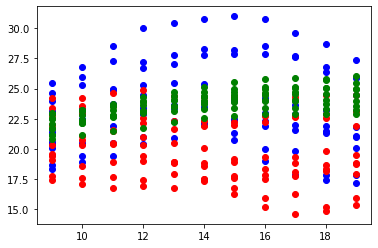

In [161]:
plt.scatter(Tin_Tout_2060['time.hh'][0:100], Tin_Tout_2060['tre200h0'][0:100], color='blue')
plt.scatter(Tin_Tout_2060['time.hh'][0:100], Tin_Tout_2060['Tin_regression'][0:100], color='red')
plt.scatter(Tin_Tout_2060['time.hh'][0:100], Tin_Tout_2060['Operating temperature'][0:100], color='green')

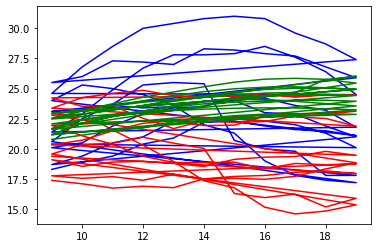

In [169]:
plt.plot(Tin_Tout_2060['time.hh'][0:100], Tin_Tout_2060['tre200h0'][0:100], color='blue')
plt.plot(Tin_Tout_2060['time.hh'][0:100], Tin_Tout_2060['Tin_regression'][0:100], color='red')
plt.plot(Tin_Tout_2060['time.hh'][0:100], Tin_Tout_2060['Operating temperature'][0:100], color='green')